<img src="../BD00-Datasets/img-datasets/ub_si.png" height="225" width="100%" />

# **N. W. Kusuma** || **`Big Data ~ RF Regression Assignment`**
***
### In this notebook assignment, we are going to explore the IBM Employee from Kaggle dataset, preprocess it, and apply Random Forrest Regression model to predict the Employee Attrition.

***
# **Libraries & Settings**
***
## Import common libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Setting compiler options
***

In [87]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
print(os.listdir("../BD00-Datasets"))

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option("display.float_format", '{:.2f}'.format)


['csv-datasets', 'db-datasets', 'img-datasets', 'New folder', '__MACOSX']


***
# **About the Data**
***
### We will be using data from a Kaggle data set:
### [pavansubhasht - ibm-hr-analytics-attrition-dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### Feature Columns
    
Uncover the factors that lead to employee attrition and explore important questions such as `show me a breakdown of distance from home by job role and attrition` or `compare average monthly income by education and attrition`’. This is a fictional data set created by IBM data scientists.

1. Education
   * 'Below College'
   * 'College'
   * 'Bachelor'
   * 'Master'
   * 'Doctor'
2. EnvironmentSatisfaction
   * 'Low'
   * 'Medium'
   * 'High'
   * 'Very High'
3. JobInvolvement
   * 'Low'
   * 'Medium'
   * 'High'
   * 'Very High'
4. JobSatisfaction
   * 'Low'
   * 'Medium'
   * 'High'
   * 'Very High'
5. PerformanceRating
   * 'Low'
   * 'Good'
   * 'Excellent'
   * 'Outstanding'
6. RelationshipSatisfaction
   * 'Low'
   * 'Medium'
   * 'High'
   * 'Very High'
7. WorkLifeBalance
   * 'Bad'
   * 'Good'
   * 'Better'
   * 'Best                         

In [88]:
df = pd.read_csv("../BD00-Datasets/csv-datasets/IBM-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


***
# 1. Data Understanding
***
## 1.1 Exploratory Data Analysis

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [90]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [91]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [92]:
categorical_col = []
print(f"{'='*70}")
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column}:\n{'-'*(len(column)+1)}\n{df[column].unique()}")
        print(f"{'='*70}")

Attrition:
----------
['Yes' 'No']
BusinessTravel:
---------------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:
-----------
['Sales' 'Research & Development' 'Human Resources']
EducationField:
---------------
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:
-------
['Female' 'Male']
JobRole:
--------
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:
--------------
['Single' 'Married' 'Divorced']
OverTime:
---------
['Yes' 'No']


In [93]:
df['Attrition'] = df.Attrition.astype("category").cat.codes
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## 1.2. Data Visualisation
***

C:\compilers\Python\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


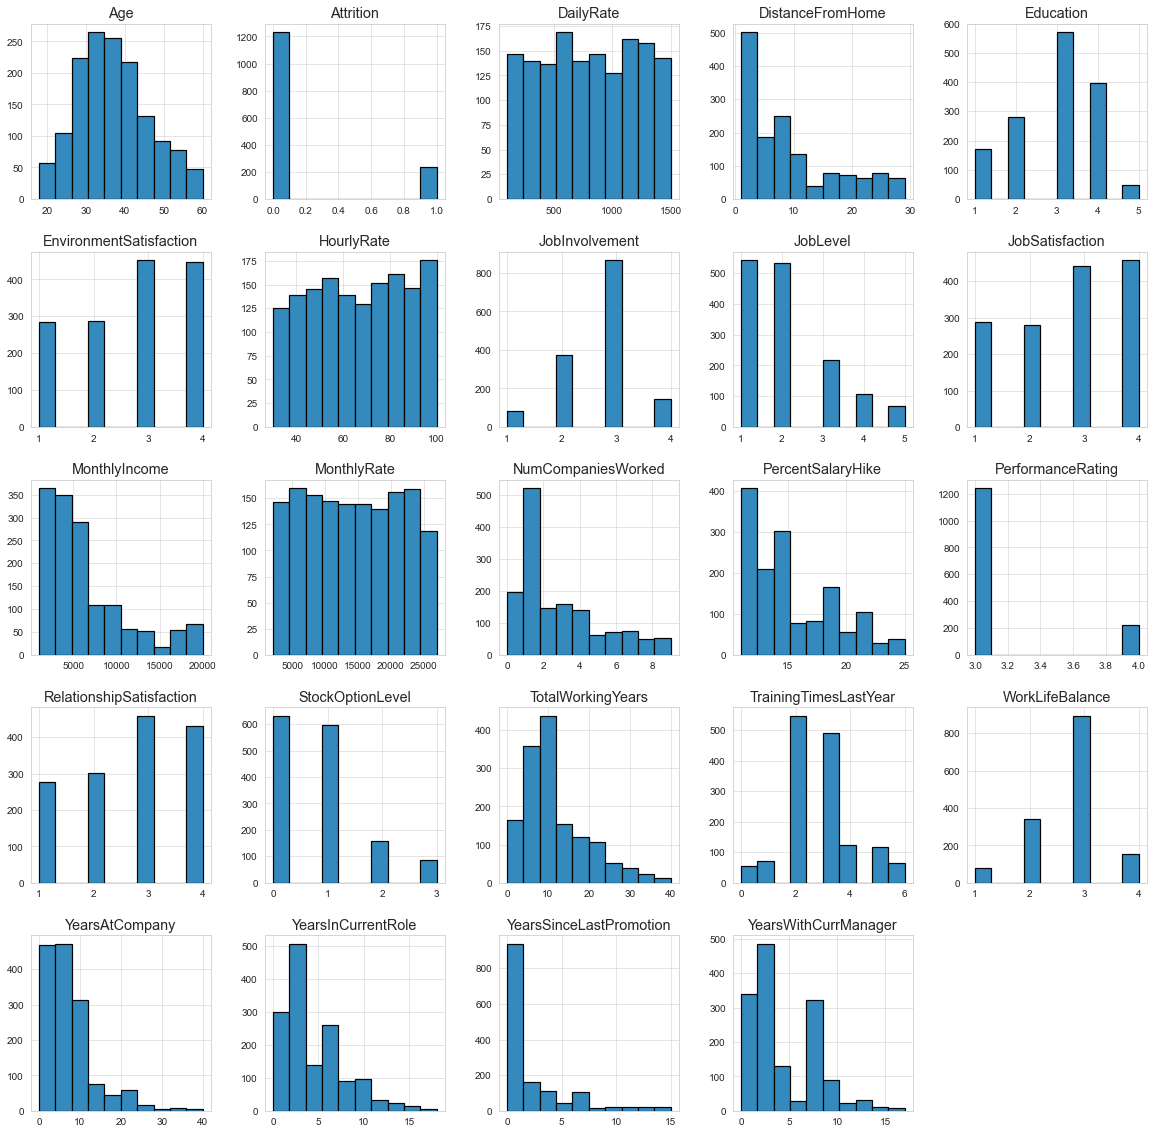

In [94]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

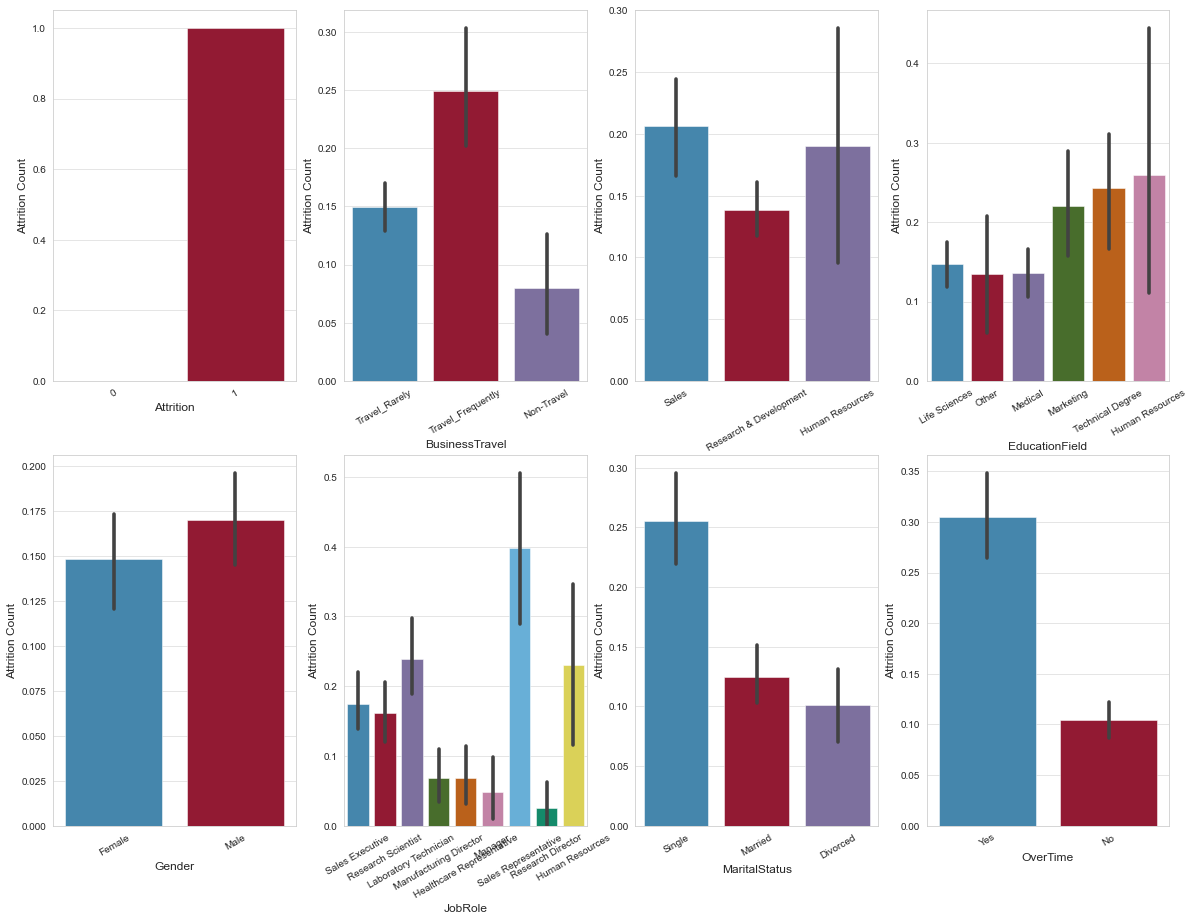

In [95]:
# Plotting how every feature correlate with the "target"
#sns.set(font_scale=1)
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(2, 4, i)
    g=sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}');

### 1.2.1 **Conclusions:**
***
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.
- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.
- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.
- `Gender` : The `Male` are more likely to quit.
- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.
- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.
- `OverTime` : The workers who work more hours are likely to quit then others.

## 1.3. Correlation Matrix
***

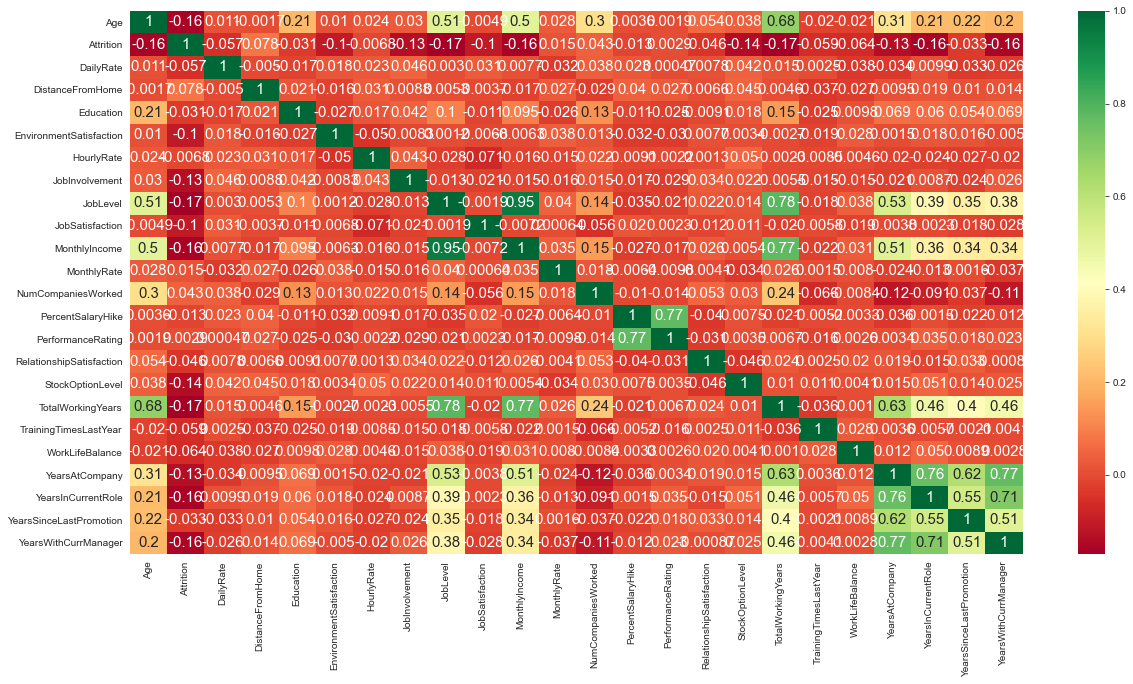

In [96]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15});

***
# 2. Data Pre-processing
***

In [97]:
# Transform categorical data into dummies
categorical_col.remove('Attrition')
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()

In [98]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

## 2.1. Assigning features
***

In [99]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

## 2.2. Train Test Split
***

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2.3. Helper function for evaluating the scores
***
Calculating `Accuracy`, `Precision`, `Recall`, and `F1` scores

In [101]:
from sklearn import metrics

def print_score(clf, X, y, train=True):
    try:
        pred = clf.predict(X)

        acc  = metrics.accuracy_score(y, pred)
        prec = metrics.precision_score(y, pred)
        rec  = metrics.recall_score(y, pred)
        f1   = metrics.f1_score(y, pred)
        cm   = metrics.confusion_matrix(y, pred)

    finally:
        if train:
            print(f"\n:: Training Result {'='*26}\n{'-'*45}")
        elif not train:         
            print(f"\n:: Testing Result {'='*27}\n{'-'*45}")

        print(f"Accuracy Score: {acc:.5f}\n{'-'*45}")
        print(f"Classification Report:\n\tPrecision Score\t: {prec:.5f}\n\tRecall Score\t: {rec:.5f}\n\tF1 Score\t: {f1:.5f}\n{'-'*45}")
        print(f"Confusion Matrix:\n{cm}\n{'='*45}")      

***
# 3. Modeling
***
## 3.1. Decision Tree Classifier

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- `max_features`: The number of features to consider when looking for the best split.
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [102]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train);

### 3.1.1. Evaluation on Train Data
***

In [103]:
print_score(tree, X_train, y_train, train=True)
#print_score(tree, X_train, y_train, X_test, y_test, train=False)


:: Training Result ==========================
---------------------------------------------
Accuracy Score: 1.00000
---------------------------------------------
Classification Report:
	Precision Score	: 1.00000
	Recall Score	: 1.00000
	F1 Score	: 1.00000
---------------------------------------------
Confusion Matrix:
[[853   0]
 [  0 176]]


### 3.1.2. Decision Tree Classifier Hyperparameter tuning
***

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

# grid_search_cv.fit(X_train, y_train)
# grid_search_cv.best_estimator_

In [105]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
tree.fit(X_train, y_train);

### 3.1.1. Evaluation on Test Data
***

In [106]:
#print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_test, y_test, train=False)


:: Testing Result ===========================
---------------------------------------------
Accuracy Score: 0.85488
---------------------------------------------
Classification Report:
	Precision Score	: 0.46154
	Recall Score	: 0.29508
	F1 Score	: 0.36000
---------------------------------------------
Confusion Matrix:
[[359  21]
 [ 43  18]]


## 3.2. Random Forest
***
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- `max_features`: The number of features to consider when looking for the best split.
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [107]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train);

### 3.1.1. Evaluation on Train Data
***

In [108]:
print_score(rand_forest, X_train, y_train, train=True)
#print_score(rand_forest, X_test, y_test, train=False)


:: Training Result ==========================
---------------------------------------------
Accuracy Score: 1.00000
---------------------------------------------
Classification Report:
	Precision Score	: 1.00000
	Recall Score	: 1.00000
	F1 Score	: 1.00000
---------------------------------------------
Confusion Matrix:
[[853   0]
 [  0 176]]


### 3.2.2. Random Forest hyperparameter tuning
***
### 3.2.2.1. Randomized Search Cross Validation
Using `Random search` to narrow down the range for each hyperparameter.

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


#rf_random.fit(X_train, y_train)
#rf_random.best_estimator_

In [110]:
rand_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(X_train, y_train);

### 3.2.2.1. Evaluation on Test Data
***

In [111]:
#print_score(rand_forest, X_train, y_train, train=True)
print_score(rand_forest, X_test, y_test, train=False)


:: Testing Result ===========================
---------------------------------------------
Accuracy Score: 0.85941
---------------------------------------------
Classification Report:
	Precision Score	: 0.45455
	Recall Score	: 0.08197
	F1 Score	: 0.13889
---------------------------------------------
Confusion Matrix:
[[374   6]
 [ 56   5]]


### 3.2.2.2. Grid Search Cross Validation
***
After knowing where to concentrate the search, with `GridSearchCV` (a method that, instead of sampling randomly from a distribution, evaluates all combinations we define) to explicitly specify every combination of settings to try.

In [112]:
param_grid = {'max_depth':[50, 60, 75], 
              'n_estimators':[1400, 1425, 1450],
              'max_features':['sqrt'],
              'min_samples_split':[4, 5, 6], 
              'min_samples_leaf':[1], 
              'bootstrap':[ False], 
              'criterion':["gini"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3)

# grid_rand_forest.fit(X_train, y_train)
# grid_rand_forest.best_estimator_

In [113]:
rand_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(X_train, y_train);

### 3.2.2.2. Evaluation on Test Data
***

In [114]:
#print_score(rand_forest, X_train, y_train, train=True)
print_score(rand_forest, X_test, y_test, train=False)


:: Testing Result ===========================
---------------------------------------------
Accuracy Score: 0.86168
---------------------------------------------
Classification Report:
	Precision Score	: 0.50000
	Recall Score	: 0.09836
	F1 Score	: 0.16438
---------------------------------------------
Confusion Matrix:
[[374   6]
 [ 55   6]]
